In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
df = pd.read_csv(r'C:\Users\matte\OneDrive\Desktop\GitHub\data\kaggle bank chrun\train.csv.zip')

### Exploration

In [6]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [7]:
df.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [23]:
for name in df.columns.tolist():
    print(name, '-->', df.duplicated(subset=name).sum())
    print()

id --> 0

CustomerId --> 141813

Surname --> 162237

CreditScore --> 164577

Geography --> 165031

Gender --> 165032

Age --> 164963

Tenure --> 165023

Balance --> 134959

NumOfProducts --> 165030

HasCrCard --> 165032

IsActiveMember --> 165032

EstimatedSalary --> 109736

Exited --> 165032



In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


c:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Balance', ylabel='Density'>

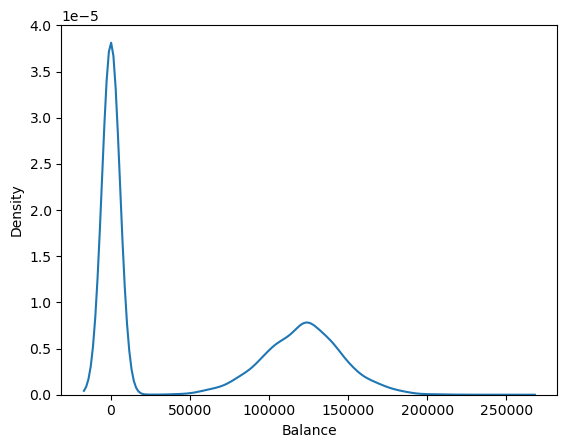

In [30]:
sns.kdeplot(data=df, x='Balance')

c:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='EstimatedSalary', ylabel='Density'>

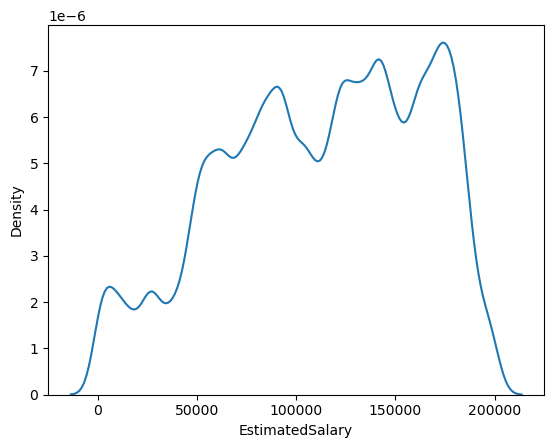

In [31]:
sns.kdeplot(data=df, x='EstimatedSalary')

c:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='CreditScore', ylabel='Density'>

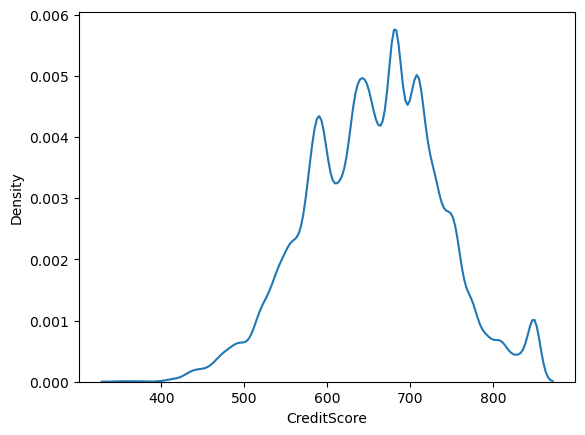

In [24]:
sns.kdeplot(data=df, x='CreditScore')

c:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

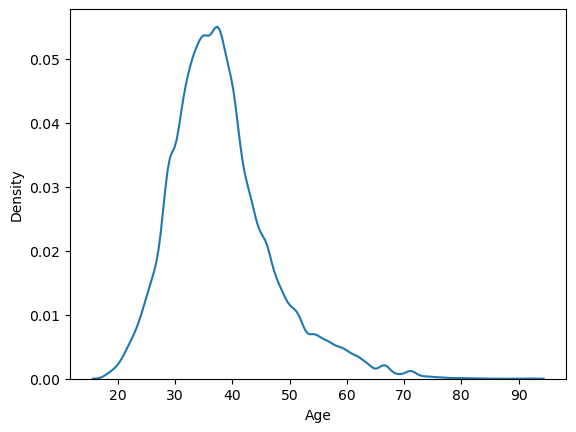

In [25]:
sns.kdeplot(data=df, x='Age')

<Axes: ylabel='Frequency'>

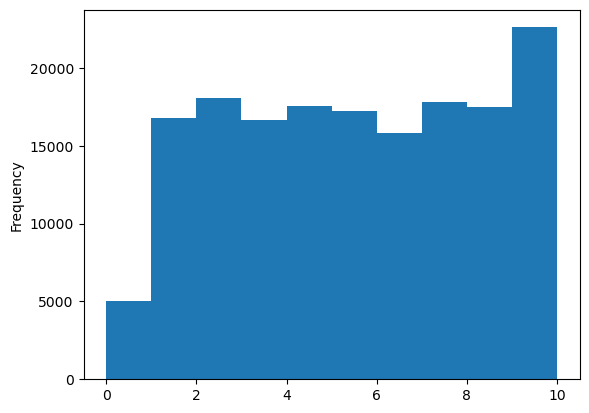

In [29]:
df['Tenure'].plot.hist(bins=10)

### ANOVA Tests

In [57]:
from scipy.stats import f_oneway

def anova_tests(data):
    if df[data].dtype == 'object':
        values = df[data].unique()
        data_for_anova = [df.loc[df[data]==x, 'Exited'] for x in values]
        print(data)
        print(f_oneway(*data_for_anova))
        print()
    
    elif len(df[data].unique()) < 5:
        values = df[data].unique()
        data_for_anova = [df.loc[df[data]==x, 'Exited'] for x in values]
        print(data)
        print(f_oneway(*data_for_anova))
        print()    

    else:
        cut_df = pd.cut(df[data], 5, labels=[0, 1,2,3,4])
        data_for_anova = [df.loc[cut_df==n, 'Exited'] for n in range(5)]
        print(data)
        print(f_oneway(*data_for_anova))      
        print()

In [58]:
for x in ['CreditScore', 'Geography', 'Gender',
          'Age', 'Tenure', 'Balance', 'NumOfProducts',
          'HasCrCard', 'IsActiveMember']:
    anova_tests(x)

CreditScore
F_onewayResult(statistic=56.31199433301987, pvalue=1.500568054485712e-47)

Geography
F_onewayResult(statistic=3850.9807436328238, pvalue=0.0)

Gender
F_onewayResult(statistic=3616.693181457038, pvalue=0.0)

Age
F_onewayResult(statistic=5818.6669417251915, pvalue=0.0)

Tenure
F_onewayResult(statistic=33.27843196929977, pvalue=8.623768939224358e-28)

Balance
F_onewayResult(statistic=855.3927221440127, pvalue=0.0)

NumOfProducts
F_onewayResult(statistic=11791.215114460987, pvalue=0.0)

HasCrCard
F_onewayResult(statistic=80.94474386262738, pvalue=2.3448985511987807e-19)

IsActiveMember
F_onewayResult(statistic=7631.6661912359805, pvalue=0.0)



### Naive Bayes

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [69]:
df = pd.concat([df, pd.get_dummies(df['Geography'], drop_first=True, dtype=float)], axis=1)
df['Gender'] = df['Gender'] == 'Male'
df['Gender'] = df['Gender'].astype(float)

df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
0,0,15674932,Okwudilichukwu,668,France,1.0,33.0,3,0.00,2,1.0,0.0,181449.97,0,0.0,0.0
1,1,15749177,Okwudiliolisa,627,France,1.0,33.0,1,0.00,2,1.0,1.0,49503.50,0,0.0,0.0
2,2,15694510,Hsueh,678,France,1.0,40.0,10,0.00,2,1.0,0.0,184866.69,0,0.0,0.0
3,3,15741417,Kao,581,France,1.0,34.0,2,148882.54,1,1.0,1.0,84560.88,0,0.0,0.0
4,4,15766172,Chiemenam,716,Spain,1.0,33.0,5,0.00,2,1.0,1.0,15068.83,0,0.0,1.0


In [73]:
unwanted = ['id', 'CustomerId', 'Surname', 'Geography', 'Exited']

predictors = [e for e in df.columns.tolist() if e not in unwanted]
predictors

['CreditScore',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Germany',
 'Spain']

In [74]:
from sklearn.naive_bayes import MultinomialNB

X = df[predictors]
y = df['Exited']

naive_model = MultinomialNB(alpha=0.01, fit_prior=True)
naive_model.fit(X,y)

MultinomialNB(alpha=0.01)

In [76]:
yhat = naive_model.predict(X)

In [79]:
from sklearn.metrics import accuracy_score

accuracy_score(y, yhat)

0.5893088696874583